# Hajbi et al.

## Execute multiple modules through all_time

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PHREEQC\ROSS\rosspy\..\databases\pitzer.json

Estimated completion in 40 seconds by 2021-10-14 01:23:35.428079 local time.


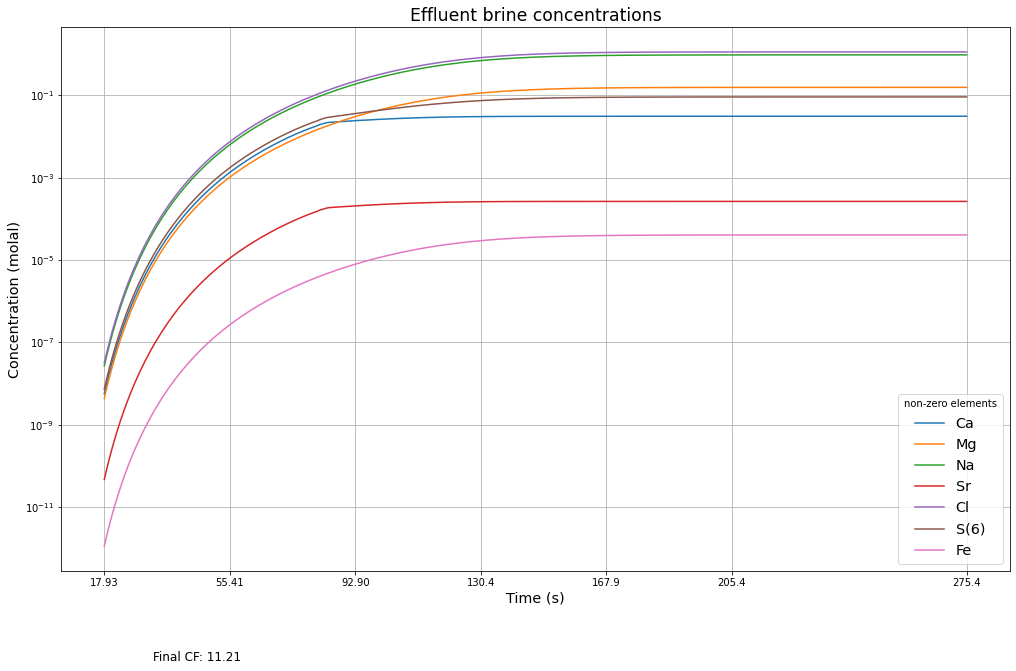

In [7]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
%run ../rosspy/core.py
ross = ROSSPkg()

# module parameters
quantity_of_modules = 5
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
phreeqc_path = 'C:\\Program Files\\USGS\\phreeqc-3.6.2-15100-x64'
database_selection = 'pitzer'
simulation_title = 'test'
simulation = 'brine'
simulation_perspective = 'all_time'
simulation_time = 275


# create the input file
ross.define_general(phreeqc_path, database_selection, simulation_title, simulation)
ross.transport(simulation_time, module_characteristics, simulation_perspective, )
ross.reaction(quantity_of_modules)
ross.solutions(custom_water_parameters = custom_water_parameters)
ross.equilibrium_phases()
ross.selected_output()
ross.export(print_block = False)

# execute the input file
data_csv = ross.execute(print_output = False)

# process the simulation results
multi_module_data = ross.process_selected_output()

## Process the results

In [2]:
from chempy.properties.water_density_tanaka_2001 import water_density
from scipy.constants import milli
from chemicals import periodic_table

display(multi_module_data)

# final effluent concentrations
last_row = multi_module_data.iloc[-1]
print(last_row)

# feed concentrations
water_density = water_density() * milli
custom_water_parameters = {
    'Ca': {
        'concentration (ppm)':720,
        'reference': ''
    },
    'Mg': {
        'concentration (ppm)':335,
        'reference':''
    },
    'Na': {
        'concentration (ppm)':1950,
        'reference':''
    },
    'Sr': {
        'concentration (ppm)':13,
        'reference':''
    },
    'Cl': {
        'concentration (ppm)':3550,
        'reference':''
    },
    'S(6)': {
        'concentration (ppm)':2250,
        'reference':''
    },
    'Fe': {
        'concentration (ppm)':0.2,
        'reference':''
    }
}

elemental_masses = {}
for element in periodic_table:
    elemental_masses[element.symbol] = element.MW

molals = {}
for element in custom_water_parameters:
    original_element = element
    element = re.sub('((?:\(\d\)))', '', element)
    mass = elemental_masses[element] 
    ppm_conc = custom_water_parameters[original_element]['concentration (ppm)'] * milli
    molal_conc = ppm_conc / water_density / mass
    molals[original_element] = molal_conc
    
# final effluent CF for each element
cfs = {}
for element, final_conc in last_row.iteritems():
    element = re.search('([A-Z][a-z]?(?:\(\d\))?(?=\(mol\/kgw\)))', element).group()
    initial_conc = molals[element]
#     print('element', element)
#     print('initial_conc', initial_conc)
#     print('final_conc', final_conc)
    cfs[element] = final_conc / initial_conc
    
print(cfs)

Ca(mol/kgw)   Mg(mol/kgw)   Na(mol/kgw)   Sr(mol/kgw)  \
Time (s)                                                             
17.927612   5.612173e-09  4.306014e-09  2.649877e-08  4.635178e-11   
18.742504   1.072278e-08  8.227194e-09  5.062931e-08  8.856103e-11   
19.557395   1.960381e-08  1.504128e-08  9.256251e-08  1.619108e-10   
20.372286   3.447404e-08  2.645067e-08  1.627747e-07  2.847263e-10   
21.187178   5.856475e-08  4.493458e-08  2.765228e-07  4.836950e-10   
...                  ...           ...           ...           ...   
272.173747  3.099078e-02  1.558953e-01  9.593634e-01  2.644130e-04   
272.988638  3.099078e-02  1.558953e-01  9.593638e-01  2.644130e-04   
273.803530  3.099078e-02  1.558954e-01  9.593642e-01  2.644130e-04   
274.618421  3.099078e-02  1.558955e-01  9.593646e-01  2.644130e-04   
275.433313  3.099078e-02  1.558955e-01  9.593650e-01  2.644130e-04   

             Cl(mol/kgw)  S(6)(mol/kgw)   Fe(mol/kgw)  
Time (s)                                               
17.927612   3.128251e-08   7.317254e-09  1.118810e-12  
18.742504   5.976927e-08   1.398056e-08  2.137631e-12  
19.557395   1.092725e-07   2.555981e-08  3.908102e-12  
20.372286   1.921599e-07   4.494789e-08  6.872545e-12  
21.187178   3.264426e-07   7.635779e-08  1.167513e-11  
...                  ...            ...           ...  
272.173747  1.132554e+00   9.130794e-02  4.050549e-05  
272.988638  1.132555e+00   9.130797e-02  4.050551e-05  
273.803530  1.132555e+00   9.130800e-02  4.050552e-05  
274.618421  1.132556e+00   9.130802e-02  4.050554e-05  
275.433313  1.132556e+00   9.130804e-02  4.050555e-05  

[317 rows x 7 columns]

Ca(mol/kgw)      0.030991
Mg(mol/kgw)      0.155896
Na(mol/kgw)      0.959365
Sr(mol/kgw)      0.000264
Cl(mol/kgw)      1.132556
S(6)(mol/kgw)    0.091308
Fe(mol/kgw)      0.000041
Name: 275.43331285573004, dtype: float64
{'Ca': 1.719973468814604, 'Mg': 11.277168533435114, 'Na': 11.277153817532415, 'Sr': 1.7768806844400726, 'Cl': 11.277168533409975, 'S(6)': 1.2973985515010822, 'Fe': 11.27676467401706}


## Execute a single module over all_time

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PHREEQC\ROSS\rosspy\..\databases\pitzer.json

Estimated completion in 11 seconds by 2021-10-14 01:22:28.808938 local time.


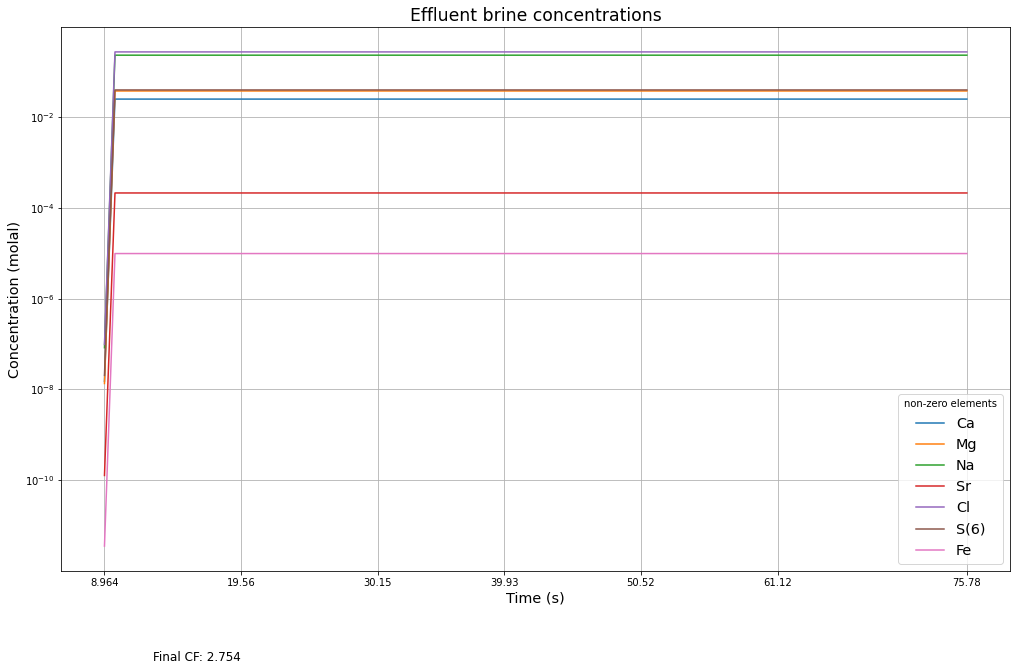

In [3]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
%run ../rosspy/core.py
ross = ROSSPkg()

# module parameters
quantity_of_modules = 1
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
phreeqc_path = 'C:\\Program Files\\USGS\\phreeqc-3.6.2-15100-x64'
database_selection = 'pitzer'
simulation_title = 'test'
simulation = 'brine'
simulation_perspective = 'all_time'
simulation_time = 75

# create the input file
ross.define_general(phreeqc_path, database_selection, simulation_title, simulation)
ross.transport(simulation_time, module_characteristics, simulation_perspective, )
ross.reaction(quantity_of_modules)
ross.solutions(custom_water_parameters = custom_water_parameters)
ross.equilibrium_phases()
ross.selected_output()
ross.export(print_block = False)

# execute the input file
data_csv = ross.execute(print_output = False)

# process the simulation results
single_module_data = ross.process_selected_output()

## Process all_time results

In [4]:
from chempy.properties.water_density_tanaka_2001 import water_density
from scipy.constants import milli
from chemicals import periodic_table

display(single_module_data)

# final effluent concentrations
last_row = single_module_data.iloc[-1]

# feed concentrations
water_density = water_density() * milli
custom_water_parameters = {
    'Ca': {
        'concentration (ppm)':720,
        'reference': ''
    },
    'Mg': {
        'concentration (ppm)':335,
        'reference':''
    },
    'Na': {
        'concentration (ppm)':1950,
        'reference':''
    },
    'Sr': {
        'concentration (ppm)':13,
        'reference':''
    },
    'Cl': {
        'concentration (ppm)':3550,
        'reference':''
    },
    'S(6)': {
        'concentration (ppm)':2250,
        'reference':''
    },
    'Fe': {
        'concentration (ppm)':0.2,
        'reference':''
    }
}

elemental_masses = {}
for element in periodic_table:
    elemental_masses[element.symbol] = element.MW

molals = {}
for element in custom_water_parameters:
    original_element = element
    element = re.sub('((?:\(\d\)))', '', element)
    mass = elemental_masses[element] 
    ppm_conc = custom_water_parameters[original_element]['concentration (ppm)'] * milli
    molal_conc = ppm_conc / water_density / mass
    molals[original_element] = molal_conc
    
# final effluent CF for each element
cfs = {}
for element, final_conc in last_row.iteritems():
    print('element', element)
    element = re.search('([A-Z][a-z]?(?:\(\d\))?(?=\(mol\/kgw\)))', element).group()
    initial_conc = molals[element]
    print('initial_conc', initial_conc)
    print('final_conc', final_conc)
    cfs[element] = final_conc / initial_conc
    
print(cfs)

Ca(mol/kgw)   Mg(mol/kgw)   Na(mol/kgw)   Sr(mol/kgw)  \
Time (s)                                                            
8.963806   1.512130e-08  1.355782e-08  8.343346e-08  1.270887e-10   
9.778697   2.533932e-02  3.829172e-02  2.356433e-01  2.157084e-04   
10.593589  2.533932e-02  3.829173e-02  2.356434e-01  2.157084e-04   
11.408480  2.533932e-02  3.829173e-02  2.356434e-01  2.157084e-04   
12.223372  2.533932e-02  3.829173e-02  2.356434e-01  2.157084e-04   
...                 ...           ...           ...           ...   
72.525340  2.533932e-02  3.829173e-02  2.356434e-01  2.157084e-04   
73.340231  2.533932e-02  3.829173e-02  2.356434e-01  2.157084e-04   
74.155123  2.533932e-02  3.829173e-02  2.356434e-01  2.157084e-04   
74.970014  2.533932e-02  3.829173e-02  2.356434e-01  2.157084e-04   
75.784906  2.533932e-02  3.829173e-02  2.356434e-01  2.157084e-04   

            Cl(mol/kgw)  S(6)(mol/kgw)   Fe(mol/kgw)  
Time (s)                                              
8.963806   9.849546e-08   2.047102e-08  3.522662e-12  
9.778697   2.781833e-01   4.030546e-02  9.949146e-06  
10.593589  2.781834e-01   4.030547e-02  9.949150e-06  
11.408480  2.781834e-01   4.030547e-02  9.949150e-06  
12.223372  2.781834e-01   4.030547e-02  9.949150e-06  
...                 ...            ...           ...  
72.525340  2.781834e-01   4.030547e-02  9.949150e-06  
73.340231  2.781834e-01   4.030547e-02  9.949150e-06  
74.155123  2.781834e-01   4.030547e-02  9.949150e-06  
74.970014  2.781834e-01   4.030547e-02  9.949150e-06  
75.784906  2.781834e-01   4.030547e-02  9.949150e-06  

[83 rows x 7 columns]

element Ca(mol/kgw)
initial_conc 0.018018175593833865
final_conc 0.02533932180282887
element Mg(mol/kgw)
initial_conc 0.013823994141902711
final_conc 0.03829173180283458
element Na(mol/kgw)
initial_conc 0.08507154974841126
final_conc 0.23564338082947525
element Sr(mol/kgw)
initial_conc 0.0001488073774830353
final_conc 0.00021570840564349842
element Cl(mol/kgw)
initial_conc 0.10042913494024724
final_conc 0.2781833861357343
element S(6)(mol/kgw)
initial_conc 0.07037779134664683
final_conc 0.04030547112418236
element Fe(mol/kgw)
initial_conc 3.591948157348583e-06
final_conc 9.949149891861392e-06
{'Ca': 1.4063200611442832, 'Mg': 2.769947050741745, 'Na': 2.7699434361588784, 'Sr': 1.4495813936919233, 'Cl': 2.7699470507362856, 'S(6)': 0.5727015632766476, 'Fe': 2.7698478530395643}


## Execute a single module over all_distance

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PHREEQC\ROSS\rosspy\..\databases\pitzer.json

Estimated completion in 11 seconds by 2021-10-14 01:22:36.606115 local time.


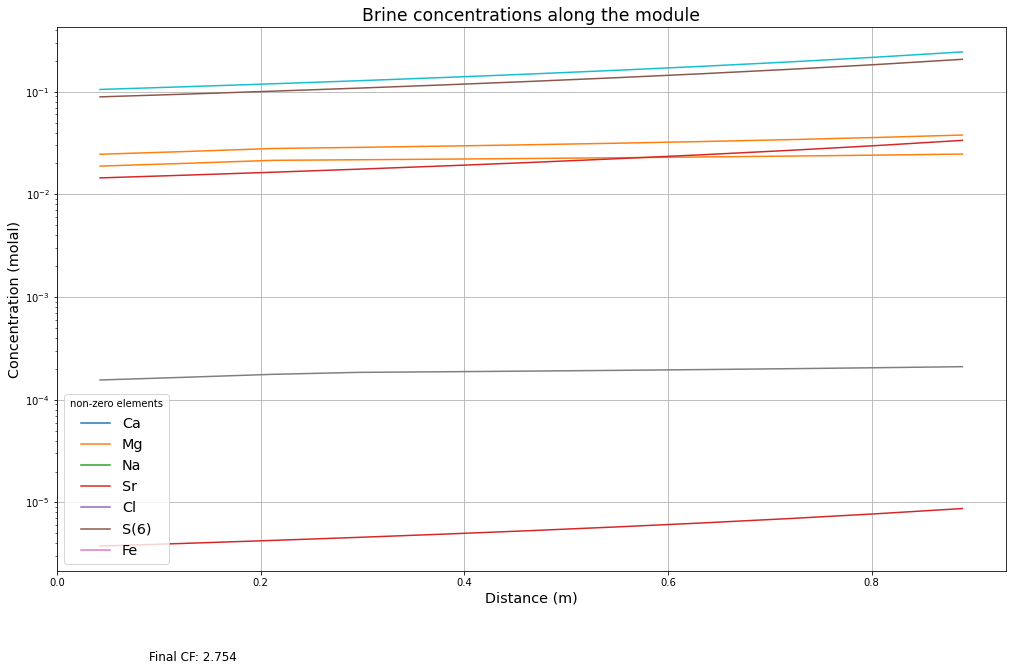

In [5]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
%run ../rosspy/core.py
ross = ROSSPkg()

# module parameters
quantity_of_modules = 1
module_characteristics = {        
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
}

# water parameters
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
phreeqc_path = 'C:\\Program Files\\USGS\\phreeqc-3.6.2-15100-x64'
database_selection = 'pitzer'
simulation_title = 'test'
simulation = 'brine'
simulation_perspective = 'all_distance'
simulation_time = 75

# create the input file
ross.define_general(phreeqc_path, database_selection, simulation_title, simulation)
ross.transport(simulation_time, module_characteristics, simulation_perspective, )
ross.reaction(quantity_of_modules)
ross.solutions(custom_water_parameters = custom_water_parameters)
ross.equilibrium_phases()
ross.selected_output()
ross.export(print_block = False)

# execute the input file
data_csv = ross.execute(print_output = False)

# process the simulation results
single_module_data = ross.process_selected_output()

## Process all_distance results

In [6]:
from chempy.properties.water_density_tanaka_2001 import water_density
from scipy.constants import milli
from chemicals import periodic_table

display(single_module_data)

# final effluent concentrations
last_row = single_module_data.iloc[-1]

# feed concentrations
water_density = water_density() * milli
custom_water_parameters = {
    'Ca': {
        'concentration (ppm)':720,
        'reference': ''
    },
    'Mg': {
        'concentration (ppm)':335,
        'reference':''
    },
    'Na': {
        'concentration (ppm)':1950,
        'reference':''
    },
    'Sr': {
        'concentration (ppm)':13,
        'reference':''
    },
    'Cl': {
        'concentration (ppm)':3550,
        'reference':''
    },
    'S(6)': {
        'concentration (ppm)':2250,
        'reference':''
    },
    'Fe': {
        'concentration (ppm)':0.2,
        'reference':''
    }
}

elemental_masses = {}
for element in periodic_table:
    elemental_masses[element.symbol] = element.MW

molals = {}
for element in custom_water_parameters:
    original_element = element
    element = re.sub('((?:\(\d\)))', '', element)
    mass = elemental_masses[element] 
    ppm_conc = custom_water_parameters[original_element]['concentration (ppm)'] * milli
    molal_conc = ppm_conc / water_density / mass
    molals[original_element] = molal_conc
    
# final effluent CF for each element
cfs = {}
for element, final_conc in last_row.iteritems():
    print('element', element)
    element = re.search('([A-Z][a-z]?(?:\(\d\))?(?=\(mol\/kgw\)))', element).group()
    initial_conc = float(molals[element])
    print('initial_conc', initial_conc)
    print('final_conc', final_conc)
    cfs[element] = float(final_conc) / initial_conc
    
print(cfs)

Ca(mol/kgw) Mg(mol/kgw) Na(mol/kgw) Sr(mol/kgw) Cl(mol/kgw)  \
Distance (m)                                                               
0.0423 m          0.0189      0.0145      0.0890     1.56e-4       0.105   
0.127 m           0.0201      0.0154      0.0947     1.66e-4       0.112   
0.212 m           0.0215      0.0164       0.101     1.77e-4       0.119   
0.296 m           0.0217      0.0176       0.108     1.85e-4       0.128   
0.381 m           0.0220      0.0189       0.117     1.87e-4       0.138   
0.466 m           0.0224      0.0205       0.126     1.90e-4       0.149   
0.550 m           0.0227      0.0223       0.137     1.93e-4       0.162   
0.635 m           0.0231      0.0243       0.150     1.97e-4       0.177   
0.720 m           0.0236      0.0268       0.165     2.01e-4       0.195   
0.804 m           0.0241      0.0299       0.184     2.05e-4       0.217   
0.889 m           0.0247      0.0336       0.207     2.10e-4       0.244   

             S(6)(mol/kgw) Fe(mol/kgw)  
Distance (m)                            
0.0423 m            0.0246     3.76e-6  
0.127 m             0.0262     4.00e-6  
0.212 m             0.0280     4.27e-6  
0.296 m             0.0287     4.57e-6  
0.381 m             0.0295     4.92e-6  
0.466 m             0.0304     5.32e-6  
0.550 m             0.0315     5.78e-6  
0.635 m             0.0327     6.33e-6  
0.720 m             0.0341     6.97e-6  
0.804 m             0.0358     7.76e-6  
0.889 m             0.0378     8.72e-6

element Ca(mol/kgw)
initial_conc 0.018018175593833865
final_conc 0.0247
element Mg(mol/kgw)
initial_conc 0.013823994141902711
final_conc 0.0336
element Na(mol/kgw)
initial_conc 0.08507154974841126
final_conc 0.207
element Sr(mol/kgw)
initial_conc 0.0001488073774830353
final_conc 2.10e-4
element Cl(mol/kgw)
initial_conc 0.10042913494024724
final_conc 0.244
element S(6)(mol/kgw)
initial_conc 0.07037779134664683
final_conc 0.0378
element Fe(mol/kgw)
initial_conc 3.591948157348583e-06
final_conc 8.72e-6
{'Ca': 1.3708380113940488, 'Mg': 2.4305565855350797, 'Na': 2.43324590432615, 'Sr': 1.4112203544742998, 'Cl': 2.4295738497117765, 'S(6)': 0.5371012541984381, 'Fe': 2.4276519643414667}
